# –ò–º–ø–æ—Ä—Ç—ã

–ó–∞–≥—Ä—É–∑–∫–∞ —Ñ–∞–π–ª–∞

In [ ]:
#! pip install gdown==v4.6.3
! pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
! gdown --id 1m4CIIXFb9fFqgvYgtagZ7Jq_O1iisRWm
# https://drive.google.com/file/d/1m4CIIXFb9fFqgvYgtagZ7Jq_O1iisRWm/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1m4CIIXFb9fFqgvYgtagZ7Jq_O1iisRWm
To: /content/playground-series-s4e3.zip
100% 1.83M/1.83M [00:00<00:00, 168MB/s]


In [ ]:
! unzip /content/playground-series-s4e3.zip -d /content/competition_format

Archive:  /content/playground-series-s4e3.zip
  inflating: /content/competition_format/sample_submission.csv  
  inflating: /content/competition_format/test.csv  
  inflating: /content/competition_format/train.csv  


–ü–æ–¥–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(4,3)})

pd.set_option('display.max_columns', None)

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score, auc, roc_auc_score

from sklearn.model_selection import train_test_split

In [ ]:
! pip install catboost

import catboost
from catboost import CatBoostClassifier, FeaturesData, metrics,  Pool, cv

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.5/98.5 MB 9.8 MB/s eta 0:00:00


In [ ]:
! pip install klib
import klib

## –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
len(test)

12814

In [ ]:
len(train)

19219

In [ ]:
train.sample(2)

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  \
16058  16058        810        824     812031     812044            69   
6720    6720         41        214    4440514    4440576          6176   

       X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
16058           11           17               6557                     80   
6720           310          159             689727                     38   

       Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
16058                    102                1360                 1   
6720                     124                1356                 0   

       TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
16058                 0                    300       0.7287       0.5385   
6720                  1                     40       0.0605       0.4577   

       Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
16058        0.5385           0.0043         0.6364         1.0000   
6720         0.3823           0.1254         0.5833         0.4545   

       Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
16058                   1.0      1.8389       0.8451       1.1139   
6720                    0.0      3.7948       2.2304       1.8261   

       Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
16058             0.4615           -0.3077          0.1965       0          0   
6720             -0.6176           -0.1851          1.0000       0          0   

       K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  
16058         0       0          0      0             1  
6720          1       0          0      0             0

In [ ]:
test.sample(2)

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  \
170   19389          4         12     835980     835993           170   
1675  20894        964        979      28972     289995           308   

      X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
170            15           26              18996                     81   
1675           29           34              30361                     99   

      Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
170                     126                1698                 0   
1675                    132                1387                 0   

      TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
170                  1                     90       0.0047       0.3383   
1675                 1                     40       0.7463       0.4398   

      Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
170         0.1842           0.0041         0.4667         1.0000   
1675        0.2800           0.0124         0.4400         0.9714   

      Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
170                    1.0      2.2304       0.8451       1.4150   
1675                   1.0      2.4885       1.2305       1.5315   

      Orientation_Index  Luminosity_Index  SigmoidOfAreas  
170              0.8158           -0.1527          0.4399  
1675             0.7200           -0.1253          0.8299

# –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ

In [ ]:
train.isna().mean()

id                       0.0
X_Minimum                0.0
X_Maximum                0.0
Y_Minimum                0.0
Y_Maximum                0.0
Pixels_Areas             0.0
X_Perimeter              0.0
Y_Perimeter              0.0
Sum_of_Luminosity        0.0
Minimum_of_Luminosity    0.0
Maximum_of_Luminosity    0.0
Length_of_Conveyer       0.0
TypeOfSteel_A300         0.0
TypeOfSteel_A400         0.0
Steel_Plate_Thickness    0.0
Edges_Index              0.0
Empty_Index              0.0
Square_Index             0.0
Outside_X_Index          0.0
Edges_X_Index            0.0
Edges_Y_Index            0.0
Outside_Global_Index     0.0
LogOfAreas               0.0
Log_X_Index              0.0
Log_Y_Index              0.0
Orientation_Index        0.0
Luminosity_Index         0.0
SigmoidOfAreas           0.0
Pastry                   0.0
Z_Scratch                0.0
K_Scatch                 0.0
Stains                   0.0
Dirtiness                0.0
Bumps                    0.0
Other_Faults  

In [ ]:
test.isna().mean()

id                       0.0
X_Minimum                0.0
X_Maximum                0.0
Y_Minimum                0.0
Y_Maximum                0.0
Pixels_Areas             0.0
X_Perimeter              0.0
Y_Perimeter              0.0
Sum_of_Luminosity        0.0
Minimum_of_Luminosity    0.0
Maximum_of_Luminosity    0.0
Length_of_Conveyer       0.0
TypeOfSteel_A300         0.0
TypeOfSteel_A400         0.0
Steel_Plate_Thickness    0.0
Edges_Index              0.0
Empty_Index              0.0
Square_Index             0.0
Outside_X_Index          0.0
Edges_X_Index            0.0
Edges_Y_Index            0.0
Outside_Global_Index     0.0
LogOfAreas               0.0
Log_X_Index              0.0
Log_Y_Index              0.0
Orientation_Index        0.0
Luminosity_Index         0.0
SigmoidOfAreas           0.0
dtype: float64

In [ ]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

### –ù–∞–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –æ—Ü–µ–Ω–∫–∏


Chat-GPT –ª—é–±–µ–∑–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª –¥–µ—Ñ–µ–∫—Ç—ã

**Pastry** (–¢–µ—Å—Ç–æ) –æ–±—ã—á–Ω–æ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –¥–µ—Ñ–µ–∫—Ç–∞–º –Ω–∞ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏ —Å—Ç–∞–ª–∏, –Ω–∞–ø–æ–º–∏–Ω–∞—é—â–∏–º –≤–Ω–µ—à–Ω–∏–π –≤–∏–¥ –∏–ª–∏ —Ç–µ–∫—Å—Ç—É—Ä—É —Ç–µ—Å—Ç–∞, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–Ω—ã–µ –Ω–µ—Ä–æ–≤–Ω–æ—Å—Ç–∏ –∏–ª–∏ —É—á–∞—Å—Ç–∫–∏ —Å –∏–∑–±—ã—Ç–æ—á–Ω—ã–º –º–∞—Ç–µ—Ä–∏–∞–ª–æ–º. –≠—Ç–∏ –¥–µ—Ñ–µ–∫—Ç—ã –º–æ–≥—É—Ç –≤–æ–∑–Ω–∏–∫–∞—Ç—å –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –Ω–∞ –Ω–∞—á–∞–ª—å–Ω—ã—Ö —ç—Ç–∞–ø–∞—Ö –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞.

**Z_Scratch** (Z-–¶–∞—Ä–∞–ø–∏–Ω–∞) —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏–µ —Ü–∞—Ä–∞–ø–∏–Ω—ã, –∏–º–µ—é—â–∏–µ —Ñ–æ—Ä–º—É –±—É–∫–≤—ã "Z" –Ω–∞ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏ –º–µ—Ç–∞–ª–ª–∞. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –º–µ—Ö–∞–Ω–∏—á–µ—Å–∫–æ–≥–æ –≤–æ–∑–¥–µ–π—Å—Ç–≤–∏—è –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏—è –∏–ª–∏ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤ –Ω–∞ —Å—Ç–∞–ª—å –≤–æ –≤—Ä–µ–º—è –µ—ë –æ–±—Ä–∞–±–æ—Ç–∫–∏.

**K_Scatch** (K-–¶–∞—Ä–∞–ø–∏–Ω–∞) - –¥–µ—Ñ–µ–∫—Ç—ã, –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ Z_Scratch, –Ω–æ —Ñ–æ—Ä–º–∏—Ä—É—é—â–∏–µ—Å—è –≤ –≤–∏–¥–µ –±—É–∫–≤—ã "K". –≠—Ç–∏ —Ü–∞—Ä–∞–ø–∏–Ω—ã —á–∞—Å—Ç–æ —è–≤–ª—è—é—Ç—Å—è —Å–ª–µ–¥—Å—Ç–≤–∏–µ–º —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏—Ö —É—Å–ª–æ–≤–∏–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏–ª–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç–∞ —Å –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ–º.

**Stains (–ü—è—Ç–Ω–∞)** - —ç—Ç–æ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ü–≤–µ—Ç–∞ –∏–ª–∏ –æ–∫—Ä–∞—Å–∫–∏ —Å—Ç–∞–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –±—ã—Ç—å –≤—ã–∑–≤–∞–Ω—ã –∫–æ—Ä—Ä–æ–∑–∏–µ–π, –æ–∫–∏—Å–ª–µ–Ω–∏–µ–º, –∫–æ–Ω—Ç–∞–∫—Ç–æ–º —Å –≤–µ—â–µ—Å—Ç–≤–∞–º–∏, –≤—ã–∑—ã–≤–∞—é—â–∏–º–∏ —Ö–∏–º–∏—á–µ—Å–∫–∏–µ —Ä–µ–∞–∫—Ü–∏–∏, –∏–ª–∏ –æ—Å—Ç–∞–≤—à–∏–º–∏—Å—è –≤–µ—â–µ—Å—Ç–≤–∞–º–∏ –æ—Ç –ø—Ä–æ—Ü–µ—Å—Å–æ–≤ –æ–±—Ä–∞–±–æ—Ç–∫–∏.

**Dirtiness** (–ì—Ä—è–∑—å) - –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –Ω–∞–ª–∏—á–∏—é –∑–∞–≥—Ä—è–∑–Ω–µ–Ω–∏–π –Ω–∞ —Å—Ç–∞–ª–∏, —Ç–∞–∫–∏—Ö –∫–∞–∫ –º–∞—Å–ª–æ, –∂–∏—Ä, –ø—ã–ª—å –∏–ª–∏ –¥—Ä—É–≥–∏–µ —á–∞—Å—Ç–∏—Ü—ã. –≠—Ç–∏ –¥–µ—Ñ–µ–∫—Ç—ã –º–æ–≥—É—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ —Å–∫–∞–∑—ã–≤–∞—Ç—å—Å—è –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ –ø–æ–∫—Ä—ã—Ç–∏—è –∏–ª–∏ –ø–æ—Å–ª–µ–¥—É—é—â–µ–π –æ–±—Ä–∞–±–æ—Ç–∫–µ —Å—Ç–∞–ª–∏.

**Bumps**
Bumps (–í—ã–ø—É–∫–ª–æ—Å—Ç–∏) - —ç—Ç–æ –≤–æ–∑–≤—ã—à–µ–Ω–∏—è –∏–ª–∏ –≤—ã–ø—É–∫–ª—ã–µ –¥–µ—Ñ–µ–∫—Ç—ã –Ω–∞ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏ —Å—Ç–∞–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –≤–æ–∑–Ω–∏–∫–Ω—É—Ç—å –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ –æ—Ö–ª–∞–∂–¥–µ–Ω–∏—è, –¥–µ—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø—Ä–∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∫–µ –∏–ª–∏ –∏–∑-–∑–∞ –≤–∫–ª—é—á–µ–Ω–∏–π –≤ –º–∞—Ç–µ—Ä–∏–∞–ª–µ.

<Axes: title={'center': 'Feature-correlation (pearson)'}>

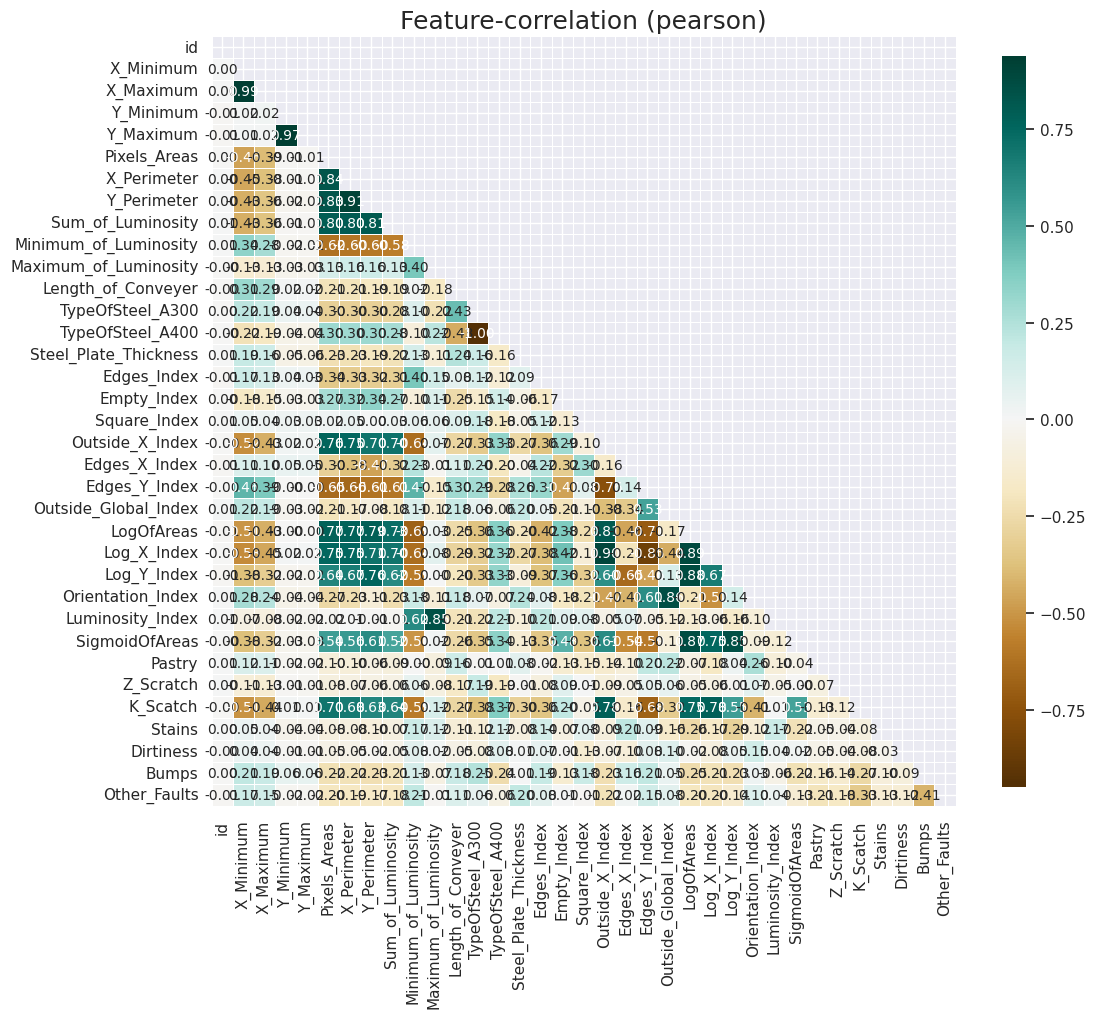

In [ ]:
# Visualize correlation heatmap
klib.corr_plot(train)

# –ò—Ç–µ—Ä–∞—Ü–∏—è 1. Catboost c –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
#–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
# –¥–µ–ª–∞—é –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∫–∏
val, train = train_test_split(train_og, train_size=0.10, random_state=7374)

In [ ]:
train.columns

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

params = {'verbose':100,
          'random_seed':7374,
          'eval_metric': 'AUC',
          #'task_type' : 'GPU'
          }

## –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è-–ø—Ä–µ–¥–∏–∫—Ç–∞ –∫–∞–∂–¥–æ–π –∏–∑ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π

In [ ]:
importances = pd.DataFrame()

for feature in y:
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.2, random_state=7374)
  #—Å–æ–∑–¥–∞–µ–º –ø—É–ª—ã
  train_data = Pool(data=train[X], label=train[feature])
  valid_data = Pool(data=val[X], label=val[feature])
  #—Å–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
  model = CatBoostClassifier(**params)
  model.fit(train_data, eval_set=valid_data)
  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = model.predict_proba(test[X])[:,1]
  #–ø–æ–ª—É—á–∞–µ–º feature_importnace, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±—ã –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Ç–∞–±–ª–∏—Ü—É importnaces
  fi = model.get_feature_importance(prettified=True)
  fi.columns = [f'{col}_{feature}' for col in fi.columns ]
  importances = pd.concat([importances, fi], axis = 1 )

In [ ]:
test[['id']+y].sample(2)

In [ ]:
importances

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

In [ ]:
test[['id']+y].to_csv('S4E3_it1_03.csv', index = False)

## –†–µ–∑—É–ª—å—Ç–∞—Ç

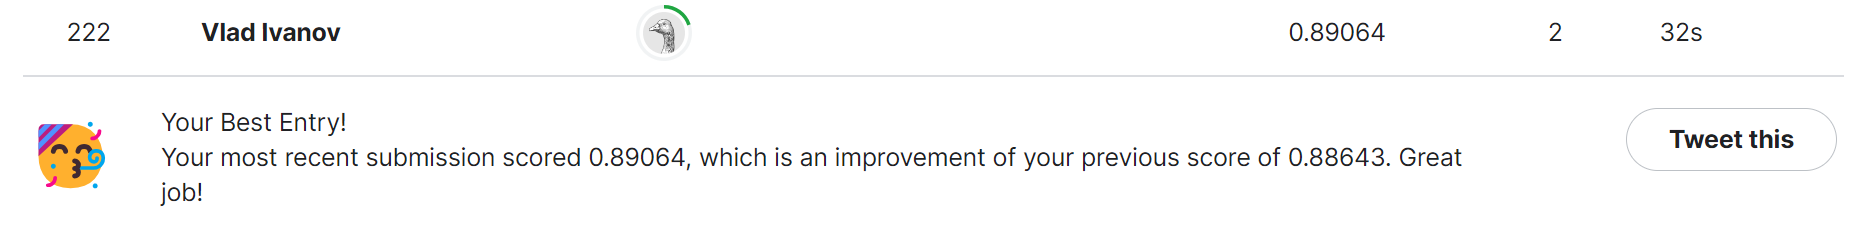

## –î–æ–±–∞–≤–∏–ª —Ä–∞–Ω–¥–æ–º–Ω—É—é –§–∏—á—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ feature_importance

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Random_F']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

params = {'verbose':100,
          'random_seed':7374,
          'eval_metric': 'AUC',
          'task_type' : 'GPU'}

## –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è-–ø—Ä–µ–¥–∏–∫—Ç–∞ –∫–∞–∂–¥–æ–π –∏–∑ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π c —Ä–∞–Ω–¥–æ–º–Ω–æ–π —Ñ–∏—á–µ–π

In [ ]:
importances = pd.DataFrame()

for feature in y:
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.10, random_state=7374)
  train['Random_F'] = np.random.randint(800, 1200, train.shape[0])
  test['Random_F'] = np.random.randint(800, 1200, test.shape[0])
  val['Random_F'] = np.random.randint(800, 1200, val.shape[0])
  #—Å–æ–∑–¥–∞–µ–º –ø—É–ª—ã
  train_data = Pool(data=train[X], label=train[feature])
  valid_data = Pool(data=val[X], label=val[feature])
  #—Å–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
  model = CatBoostClassifier(**params)
  model.fit(train_data,eval_set=valid_data)
  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = model.predict_proba(test[X])[:,1]
  #–ø–æ–ª—É—á–∞–µ–º feature_importnace, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±—ã –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Ç–∞–±–ª–∏—Ü—É importnaces
  fi = model.get_feature_importance(prettified=True)
  fi.columns = [f'{col}_{feature}' for col in fi.columns ]
  importances = pd.concat([importances, fi], axis = 1 )

In [ ]:
importances

# –ò—Ç–µ—Ä–∞—Ü–∏—è 2. XGBoost c –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π

In [ ]:
import xgboost
from xgboost import XGBClassifier

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
#–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
# –¥–µ–ª–∞—é –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∫–∏
#val, train = train_test_split(train_og, train_size=0.20, random_state=7374)

In [ ]:
train.columns

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è-–ø—Ä–µ–¥–∏–∫—Ç–∞ –∫–∞–∂–¥–æ–π –∏–∑ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.10, random_state=7374)

  #—Å–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
  model = xgboost.XGBClassifier(use_label_encoder=False,
                                eval_metric='auc',
                                max_depth = 3,
                                subsample = 0.8,
                                colsample_bytree = 0.6,
                                n_estimators = 300)

  model.fit(train[X],train[y])

  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = model.predict_proba(test[X])[:,1]


In [ ]:
test

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

In [ ]:
test[['id']+y].to_csv('S4E3_it2_xgboost_2.csv', index = False)

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã

#–ò—Ç–µ—Ä–∞—Ü–∏—è 3. –° **hyperopt**

In [ ]:
!pip install hyperopt
import hyperopt

In [ ]:
SEED = 7374

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## –§—É–Ω–∫—Ü–∏—è –¥–ª—è hyperopt

In [ ]:
def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=140,
        eval_metric=metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.Logloss()
    )

    cv_data = cv(
        Pool(train[X], train[feature]),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])

    return 1 - best_accuracy # as hyperopt minimises

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.10, random_state=7374)
  #—Å–æ–∑–¥–∞–µ–º –ø—É–ª—ã
  train_data = Pool(data=train[X], label=train[feature])
  valid_data = Pool(data=val[X], label=val[feature])
  #–ø—Ä–æ–ø–∏—Å—ã–≤–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
  params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 0.1),
  }

  trials = hyperopt.Trials()

  best = hyperopt.fmin(
      hyperopt_objective,
      space=params_space,
      algo=hyperopt.tpe.suggest,
      max_evals=10,
      trials=trials,
      rstate=np.random.default_rng(SEED)
  )


  #—Å–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
  model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=140,
    eval_metric='AUC',
    random_seed=SEED,
    verbose=False,
    loss_function=metrics.Logloss(),
    )

  model.fit(train[X], train[feature])

  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = model.predict_proba(test[X])[:,1]

  #–ø–æ–ª—É—á–∞–µ–º feature_importnace, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±—ã –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Ç–∞–±–ª–∏—Ü—É importnaces
  fi = model.get_feature_importance(prettified=True)
  fi.columns = [ f'{col}_{feature}' for col in fi.columns ]
  importances = pd.concat([importances, fi], axis = 1 )

–ü–æ–º–µ–Ω—è—Ç—å –º–µ—Ç—Ä–∏–∫—É eval_metrics

In [ ]:
test

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

In [ ]:
test[['id']+y].to_csv('S4E3_it3_02.csv', index = False)

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã

# –ò—Ç–µ—Ä–∞—Ü–∏—è 4. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ñ–∏—á

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [ ]:
len(train[train[y].sum(axis=1) > 1])

–í –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å —Å—Ä–∞–∑—É –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–µ—Ñ–µ–∫—Ç–æ–≤. –£–±–∏—Ä–∞–µ–º —Ç–∞–∫–∏–µ —Å—Ç—Ä–æ–∫–∏, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

In [ ]:
train = train[train[y].sum(axis=1) <= 1]

–î–ª—è –±–æ–ª—å—à–µ–π —á–∞—Å—Ç–∏ –∑–∞–ø–∏—Å–µ–π –≤ —Ç–∞–±–ª–∏—Ü–µ —É–∫–∞–∑–∞–Ω –∫–ª–∞—Å—Å —Å—Ç–∞–ª–∏ –ê300 –∏–ª–∏ –ê400. –£–±–µ—Ä–µ–º —Ç–∞–∫ –∂–µ —Å—Ç—Ä–æ–∫–∏ –≥–¥–µ —Å—Ç–∞–ª—å –¥—Ä—É–≥–æ–≥–æ –∫–ª–∞—Å—Å–∞.

In [ ]:
(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']).mean()

In [ ]:
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]

## –£–º–µ–Ω—å—à–µ–Ω–∏–µ –∫–æ–ª-–≤–æ —Ñ–∏—á–µ–π, –∑–∞ —Å—á–µ—Ç –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω–Ω—ã—Ö

In [ ]:
#—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
corr_matrix = train[X].corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
#—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É —Å–≤—è–∑–µ–π
linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
linkage_matrix

–§—É–Ω–∫—Ü–∏—è, **create_clusters**, –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–∞ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏, –∏—Å–ø–æ–ª—å–∑—É—è –¥–≤–∞ –æ—Å–Ω–æ–≤–Ω—ã—Ö –≤—Ö–æ–¥–Ω—ã—Ö –∞—Ä–≥—É–º–µ–Ω—Ç–∞: –º–∞—Ç—Ä–∏—Ü—É —Å–≤—è–∑–µ–π (`l_matrix`) –∏ –º–∞—Ç—Ä–∏—Ü—É —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ (`c_matrix`). –í –¥–æ–ø–æ–ª–Ω–µ–Ω–∏–µ, —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –ø–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (`th`), –∫–æ—Ç–æ—Ä–æ–µ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ –≤ 0.15, –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –∫–ª–∞—Å—Ç–µ—Ä—ã –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã.

–í–æ—Ç –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ–µ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏:

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ñ—É–Ω–∫—Ü–∏–∏:

`l_matrix` (np.ndarray): –ú–∞—Ç—Ä–∏—Ü–∞ —Å–≤—è–∑–µ–π, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∞—è –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–æ–µ –¥—Ä–µ–≤–æ–≤–∏–¥–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —ç–ª–µ–º–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞–Ω—ã.

`c_matrix` (pd.DataFrame): DataFrame, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ (–∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏) –∫–∞–∂–¥–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞. –°—Ç–æ–ª–±—Ü—ã —ç—Ç–æ–≥–æ DataFrame —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Ä–∞–∑–ª–∏—á–Ω—ã–º —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º.

`th` (float, –Ω–µ–æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã–π): –ü–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤. –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ –≤ 0.15.

–ü–µ—Ä–≤–æ–∏—Å—Ç–æ—á–Ω–∏–∫: https://www.kaggle.com/code/noepinefrin/0-89534-clustered-feature-lgbm-xgb-cat/notebook

In [ ]:
def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))

    print(f'Number of clusters: {n_clusters}')

    cluster_features = {}

    for label in range(1, n_clusters + 1):

        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

    return cluster_features

In [ ]:
clusters = create_clusters(linkage_matrix, corr_matrix, 0.01)
clusters

–ü—Ä–∏ –≤—ã—Å—Ç–∞–≤–ª–µ–Ω–∏–∏ –ø–æ—Ä–æ–≥–∞ –Ω–∞ 0.01 - –ø–æ–ª—É—á–∞–µ–º 25 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏–∑ 27 –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã—Ö —Ñ–∏—á. –ü–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è —Ä–∞–Ω–µ–µ –≤—ã–¥–≤–∏–Ω—É—Ç–æ–π –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –æ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —É–±—Ä–∞—Ç—å –æ–¥–∏–Ω –∏–∑ –∫–ª–∞—Å—Å–æ–≤ `['TypeOfSteel_A300', 'TypeOfSteel_A400']` –∫–∞–∫ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω–Ω—ã–µ. –¢–∞–∫ –∂–µ –Ω–∞–π–¥–µ–Ω–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É `['Pixels_Areas', 'LogOfAreas']`


–ü–æ–ø—Ä–æ–±—É–µ–º —É–≤–µ–ª–∏—á–∏—Ç—å –ø–æ—Ä–æ–≥, –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (—Ñ–∏—á –¥–ª—è —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è)

In [ ]:
clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters

–û—Å—Ç–∞–≤–ª—è–µ–º —Ñ–∏—á–∏ —Å–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏:

In [ ]:
#filtered_features
filtered_X = [column[0] for column in clusters.values()]
filtered_X

–° –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π 10%

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.1, random_state=7374)
  #—Å–æ–∑–¥–∞–µ–º –ø—É–ª—ã
  train_data = Pool(data=train[filtered_X], label=train[feature])
  valid_data = Pool(data=val[filtered_X], label=val[feature])
  #—Å–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
  model = CatBoostClassifier(**params)
  model.fit(train_data, eval_set=valid_data)

  # –ü–æ–ª—É—á–µ–Ω–∏–µ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏
  best_params = model.get_params()
  print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", best_params)

  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = model.predict_proba(test[filtered_X])[:,1]


  #–ø–æ–ª—É—á–∞–µ–º feature_importnace, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±—ã –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Ç–∞–±–ª–∏—Ü—É importnaces
  fi = model.get_feature_importance(prettified=True)
  fi.columns = [f'{col}_{feature}' for col in fi.columns ]
  importances = pd.concat([importances, fi], axis = 1 )

In [ ]:
importances

–†–µ–∑—É–ª—å—Ç–∞—Ç —Å –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π 0.1

**Score: 0.89035**

–ë–µ–∑ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏, –æ–±—É—á–µ–Ω–∏–µ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ö—É–∂–µ.

Score: 0.88464

–†–µ–∑—É–ª—å—Ç–∞—Ç —Å –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π 0.2

Score: 0.88935


# –ò—Ç–µ—Ä–∞—Ü–∏—è 4.1. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ñ–∏—á + –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –æ—Ç–¥–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–∞—Ä–≥–µ—Ç-—Ñ–∏—á–∏. –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Å–µ—Ç–∫–∏

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')
train_og = train

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [ ]:
train = train[train[y].sum(axis=1) <= 1]
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]
#—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
corr_matrix = train[X].corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
#—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É —Å–≤—è–∑–µ–π
linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
linkage_matrix

In [ ]:
def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))

    print(f'Number of clusters: {n_clusters}')

    cluster_features = {}

    for label in range(1, n_clusters + 1):

        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

    return cluster_features


clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters

#filtered_features –û—Å—Ç–∞–≤–ª—è–µ–º —Ñ–∏—á–∏ —Å–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏:
filtered_X = [column[0] for column in clusters.values()]
filtered_X

## –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ —Ñ–∏—á

In [ ]:
params = {'verbose':200,
          'random_seed':7374,
          'eval_metric': 'AUC',
          #'task_type' : 'GPU',
          'early_stopping_rounds': 250,
          }

## –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è-–ø—Ä–µ–¥–∏–∫—Ç–∞ –∫–∞–∂–¥–æ–π –∏–∑ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π

In [ ]:
#–Ω–∞—á–∞–ª—å–Ω–∞—è —Å–µ—Ç–∫–∞
# grid = {'learning_rate': [0.01, 0.05, 0.1],
#         'depth': [5, 6, 10],
#         'min_data_in_leaf' : [3, 10, 12]}

### [Pastry]  

In [ ]:
feature = 'Pastry'

In [ ]:
grid = {'learning_rate': [0.02],
        'depth': [6],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#—Å–æ–∑–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å
model = CatBoostClassifier(**params)
#—Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#–õ—É—á—à–∏–µ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
result['params']

–§–∏–∫—Å–∏—Ä—É–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã. –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞ –¥–ª—è —Ç–µ—Å—Ç–∞

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Z_Scratch]  

In [ ]:
feature = 'Z_Scratch'

In [ ]:
grid = {'learning_rate': [0.1],
        'depth': [10],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#—Å–æ–∑–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å
model = CatBoostClassifier(**params)
#—Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#–õ—É—á—à–∏–µ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [K_Scatch]  

In [ ]:
feature = 'K_Scatch'

In [ ]:
grid = {'learning_rate': [0.2],
        'depth': [5],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#—Å–æ–∑–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å
model = CatBoostClassifier(**params)
#—Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#–õ—É—á—à–∏–µ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Stains]  

In [ ]:
feature = 'Stains'

In [ ]:
grid = {'learning_rate': [0.015],
        'depth': [5],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#—Å–æ–∑–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å
model = CatBoostClassifier(**params)
#—Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#–õ—É—á—à–∏–µ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Dirtiness]  

In [ ]:
feature = 'Dirtiness'

In [ ]:
grid = {'learning_rate': [0.1995],
        'depth': [5],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#—Å–æ–∑–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å
model = CatBoostClassifier(**params)
#—Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#–õ—É—á—à–∏–µ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Bumps]  

In [ ]:
feature = 'Bumps'

In [ ]:
grid = {'learning_rate': [0.01],
        'depth': [6],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#—Å–æ–∑–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å
model = CatBoostClassifier(**params)
#—Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#–õ—É—á—à–∏–µ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

### [Other_Faults]  

In [ ]:
feature = 'Other_Faults'

In [ ]:
grid = {'learning_rate': [0.1],
        'depth': [6],
        'min_data_in_leaf' : [3]}

In [ ]:
train_data = Pool(data=train[filtered_X], label=train[feature])
#—Å–æ–∑–¥–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å
model = CatBoostClassifier(**params)
#—Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
result = model.grid_search(grid, train_data, verbose=False)

In [ ]:
#–õ—É—á—à–∏–µ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
result['params']

In [ ]:
test[feature] = model.predict_proba(test[filtered_X])[:,1]
test.sample(1)

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

In [ ]:
test[['id']+y].to_csv('S4E3_it4_manual_grid.csv', index = False)

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã

–†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥–∏–∫—Ç–∞ —Å —Ä—É—á–Ω–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ:  
Score: **0.87818**


# –ò—Ç–µ—Ä–∞—Ü–∏—è 5. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ñ–∏—á + Optuna —Å Catboost

In [ ]:
! pip install optuna

In [ ]:
import optuna

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [ ]:
train = train[train[y].sum(axis=1) <= 1]
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]
# #—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
# corr_matrix = train[X].corr('spearman')
# dissimilarity = 1 - abs(corr_matrix.values)
# #—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É —Å–≤—è–∑–µ–π
# linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
# #linkage_matrix


# def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
#     cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
#     n_clusters = len(set(cluster_labels))

#     print(f'Number of clusters: {n_clusters}')

#     cluster_features = {}

#     for label in range(1, n_clusters + 1):

#         leaves_in_cluster = cluster_labels == label
#         cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

#     return cluster_features


# clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
# clusters

# #filtered_features –û—Å—Ç–∞–≤–ª—è–µ–º —Ñ–∏—á–∏ —Å–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏:
# filtered_X = [column[0] for column in clusters.values()]
# filtered_X

In [ ]:
train_og = train

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

## –ù–∞—Å—Ç—Ä–æ–π–∫–∞ Optuna (–ø–µ—Ä–µ–Ω–µ—Å–µ–Ω–æ –≤–Ω—É—Ç—Ä—å —Ü–∏–∫–ª–∞)

## –¶–∏–∫–ª –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –æ–±—É—á–µ–Ω–∏—è-–ø—Ä–µ–¥–∏–∫—Ç–∞ –∫–∞–∂–¥–æ–π –∏–∑ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  print("Feature: ", feature)
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.15, random_state=74, stratify = train_og[feature])

  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = catboost.CatBoostClassifier(**params, silent=True)
    model.fit(train[X], train[feature])
    predictions = model.predict(val[X])
    ll = Logloss(val[feature], predictions)
    return ll

  study = optuna.create_study(direction='minimize')
  study.optimize(objective, n_trials=30)

  best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  model = catboost.CatBoostClassifier(**best_trial.params, silent=True)
  model.fit(train_data)

  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = model.predict_proba(test[X])[:,1]

  #–ø–æ–ª—É—á–∞–µ–º feature_importnace, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±—ã –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Ç–∞–±–ª–∏—Ü—É importnaces
  importances = importances.append(study.best_params, ignore_index=True)

In [ ]:
importances

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

In [ ]:
test[['id']+y].to_csv('S4E3_it5_30_trials_015.csv', index = False)

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã

–†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥–∏–∫—Ç–∞

–¥–ª—è n-trials = **2**: **0.88785**

–¥–ª—è n-trials = **10** (t = 25 min): **0.88992**

–¥–ª—è n-trials = **10** (t = 18 min, —Å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–æ–π): **0.88941**

–¥–ª—è n-trials = **10** (t = 18 min, —Å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–æ–π –∏ –Ω–∞ —É–º–µ–Ω—å—à–µ–Ω–Ω–æ–π –¥–æ 10% –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏): **0.88506**

–¥–ª—è n-trials = **10** (t = 25 min, –±–µ–∑ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ —Ñ–∏—á, –Ω–∞ 15% –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏): **0.88934**

–¥–ª—è n-trials = **30** (t = 45 min, –±–µ–∑ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ —Ñ–∏—á, –Ω–∞ 15% –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏): **0.88538**


# –ò—Ç–µ—Ä–∞—Ü–∏—è 6. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ñ–∏—á + Optuna —Å XGBoost

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [ ]:
train = train[train[y].sum(axis=1) <= 1]
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]

In [ ]:
train_og = train

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

## –ù–∞—Å—Ç—Ä–æ–π–∫–∞ Optuna (–≤–Ω—É—Ç—Ä–∏ —Ü–∏–∫–ª–∞)

In [ ]:
importances = pd.DataFrame()

for feature in tqdm(y):
  print("Feature: ", feature)
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.15, random_state=74, stratify = train_og[feature])

  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        #"iterations": 1000,
        "eta": trial.suggest_float("eta", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = xgboost.XGBClassifier(**params)
    model.fit(train[X], train[feature])
    predictions = model.predict(val[X])

    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=25)

  best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  model = xgboost.XGBClassifier(**best_trial.params)
  model.fit(train_og[X], train_og[feature])

  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = model.predict_proba(test[X])[:,1]

  #–ø–æ–ª—É—á–∞–µ–º feature_importnace, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±—ã –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Ç–∞–±–ª–∏—Ü—É importnaces
  importances = importances.append(study.best_params, ignore_index=True)

In [ ]:
test.sample(5)

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

In [ ]:
test[['id']+y].to_csv('S4E3_it6_trails25.csv', index = False)

# –ò—Ç–µ—Ä–∞—Ü–∏—è 7. Optuna —Å –∞–Ω—Å–∞–º–±–ª–µ–º (XGBoost + Catboost)

In [ ]:
! pip install optuna

import optuna

In [ ]:
import xgboost
from xgboost import XGBClassifier

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [ ]:
train = train[train[y].sum(axis=1) <= 1]
train = train[(train['TypeOfSteel_A300'] + train['TypeOfSteel_A400']) != 0]
#—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
corr_matrix = train[X].corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
#—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É —Å–≤—è–∑–µ–π


linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
#linkage_matrix


def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.15) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))

    print(f'Number of clusters: {n_clusters}')

    cluster_features = {}

    for label in range(1, n_clusters + 1):

        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

    return cluster_features


clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters

#filtered_features –û—Å—Ç–∞–≤–ª—è–µ–º —Ñ–∏—á–∏ —Å–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏:
filtered_X = [column[0] for column in clusters.values()]
filtered_X

In [ ]:
train_og = train
X = filtered_X

## –¶–∏–∫–ª –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –æ–±—É—á–µ–Ω–∏—è-–ø—Ä–µ–¥–∏–∫—Ç–∞ –∫–∞–∂–¥–æ–π –∏–∑ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π

In [ ]:
N_trials = 5

In [ ]:
importances = pd.DataFrame()

results = []

for feature in tqdm(y):
  print("Feature: ", feature)
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.25, random_state=74, stratify = train_og[feature])

  '''
  CATBOOST
  '''
  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    Cat_model = catboost.CatBoostClassifier(**params, silent=True)
    Cat_model.fit(train[X], train[feature])
    predictions = Cat_model.predict(val[X])
    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=N_trials)

  Cat_best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  Cat_model = catboost.CatBoostClassifier(**Cat_best_trial.params, silent=True)
  Cat_model.fit(train_data)

  print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã Cat_model:  ', study.best_params, N_trials)
  '''
  XGBOOST
  '''
  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        #"iterations": 1000,
        "eta": trial.suggest_float("eta", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    XGB_model = xgboost.XGBClassifier(**params)
    XGB_model.fit(train[X], train[feature])
    predictions = XGB_model.predict(val[X])

    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=N_trials)

  XGB_best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  XGB_model = xgboost.XGBClassifier(**XGB_best_trial.params)
  XGB_model.fit(train_og[X], train_og[feature])

  print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã XGB_model:  ', study.best_params, N_trials)

  '''
  VotingClassifier
  '''
  ensemble_model = VotingClassifier(
    estimators=[('cat', Cat_model), ('xgb', XGB_model)],
    voting='soft'
  )

  params_grid = {

      'weights': [(1, 1),
       (2, 1), (1, 2),(1,4), (4,1),
      (1,7), (7,1), (1,10), (10,1),
      (1,20), (20,1),]
      #
          # #'lr__C' : [0.5,1,1.5],
          # #'lr__class_weight': [None,'balanced'],
          # #'nb__alpha' : [0.1,1,2],
          # 'sgd__penalty' : ['l2', 'l1'],
          # 'sgd__alpha': [0.0001,0.001,0.01]
                  }

  grid = GridSearchCV(estimator=ensemble_model,
                      param_grid=params_grid,
                      cv=3, scoring='roc_auc',
                      n_jobs=-1)

  grid.fit(train_og[X], train_og[feature])

  #print(grid)

  print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã grid -- ', grid.best_params_)

  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = grid.predict_proba(test[X])[:,1]

  #–ø–æ–ª—É—á–∞–µ–º feature_importnace, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±—ã –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Ç–∞–±–ª–∏—Ü—É importnaces


  importances = importances.append(results, ignore_index=True)

In [ ]:
ensemble_model

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

In [ ]:
test[['id']+y].to_csv('S4E3_it7_trails5_allweights2.csv', index = False)

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã

–¥–ª—è n-trials = **5**:
–ù–æ–≤—ã–π –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–∫–æ—Ä–∞: **0.89154**

–¥–ª—è n-trials = **5** c —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–µ–π –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö —Ñ–∏—á: 0.88873

–¥–ª—è n-trials = **30**:  **0.88815**

–¥–ª—è n-trials = **5** c –ø–æ–¥–±–æ—Ä–æ–≤ –≤–µ—Å–æ–≤ –ø–æ —Å–µ—Ç–∫–µ: **0.88966**


–¥–ª—è n-trials = **5** c –ø–æ–¥–±–æ—Ä–æ–≤ –≤–µ—Å–æ–≤ –ø–æ —Å–µ—Ç–∫–µ: **0.8899** (cv = 3)

–¥–ª—è n-trials = **5** c –ø–æ–¥–±–æ—Ä–æ–≤ –≤–µ—Å–æ–≤ –ø–æ —Å–µ—Ç–∫–µ: **0.88955** (cv = 3)
(–∞–Ω–∞–ª–æ–≥–∏—è –ø—Ä–æ—à–ª–æ–π –ø–æ–ø—ã—Ç–∫–∏ –Ω–æ —Å —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–µ–π –∫–æ–ª-–≤–∞ —Ñ–∏—á –ø–æ –º–∞—Ç—Ä–∏—Ü–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π)



# –ò—Ç–µ—Ä–∞—Ü–∏—è 8. Optuna —Å –∞–Ω—Å–∞–º–±–ª–µ–º (XGBoost + Catboost) + FeatureEng

In [ ]:
! pip install optuna

import optuna
import xgboost
from xgboost import XGBClassifier
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

### üîÉ –¢–æ—á–∫–∞ —Ä–µ—Å—Ç–∞—Ä—Ç–∞ üîÉ

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')
test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
X = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

y = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [ ]:
def preprocess_data(data):

  epsilon = 1e-6
  # A small constant to avoid division by zero or taking the logarithm of zero


  data = data[(data['TypeOfSteel_A300'] + data['TypeOfSteel_A400']) != 0]

  data['Color_Range'] = data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity']
  data['Normalized_Luminosity_Index'] = data['Luminosity_Index'] / data['Pixels_Areas']


#–í—ã—á–∏—Å–ª—è–µ—Ç –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –ø–ª–æ—â–∞–¥–∏ –¥–µ—Ñ–µ–∫—Ç–∞ —Å—Ç–∞–ª–∏ –∫ –µ–≥–æ –ø–µ—Ä–∏–º–µ—Ç—Ä—É –ø–æ –æ—Å—è–º X –∏ Y,
#—á—Ç–æ –¥–∞–µ—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ –∫–æ–º–ø–∞–∫—Ç–Ω–æ—Å—Ç–∏ –¥–µ—Ñ–µ–∫—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∏–∑–º–µ—Ä–µ–Ω–∏–∏'''

  data['Area_Perimeter_Ratio_X'] = data['Pixels_Areas'] / data['X_Perimeter']
  data['Area_Perimeter_Ratio_Y'] = data['Pixels_Areas'] / data['Y_Perimeter']

  data['Aspect_Ratio'] = (data['X_Maximum'] - data['X_Minimum']) / (abs(data['Y_Maximum'] - data['Y_Minimum']) + 1)

  data['Edge_to_Area_Ratio'] = data['Edges_Index'] / data['Pixels_Areas']

  # Symmetry Index Feature
  # Location Features
  data['X_Distance'] = data['X_Maximum'] - data['X_Minimum']
  data['Y_Distance'] = data['Y_Maximum'] - data['Y_Minimum']

  data['Symmetry_Index'] = np.abs(data['X_Distance'] - data['Y_Distance']) / (data['X_Distance'] + data['Y_Distance'] + epsilon)

  # Density Feature
  data['Density'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])

In [ ]:
preprocess_data(train)
train = train[train[y].sum(axis=1) <= 1]

In [ ]:
preprocess_data(test)

–°–º–æ—Ç—Ä–∏–º –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª–∏—Å—å –∫–ª–∞—Å—Ç–µ—Ä—ã —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º –Ω–æ–≤—ã—Ö —Ñ–∏—á

In [ ]:
#—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
corr_matrix = train[X].corr('spearman')
dissimilarity = 1 - abs(corr_matrix.values)
#—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É —Å–≤—è–∑–µ–π


linkage_matrix = hierarchy.linkage(squareform(dissimilarity), method='complete')
#linkage_matrix


def create_clusters(l_matrix: np.ndarray, c_matrix: pd.DataFrame, th: float = 0.2) -> dict:
    cluster_labels = hierarchy.fcluster(l_matrix, th, criterion='distance')
    n_clusters = len(set(cluster_labels))

    print(f'Number of clusters: {n_clusters}')

    cluster_features = {}

    for label in range(1, n_clusters + 1):

        leaves_in_cluster = cluster_labels == label
        cluster_features[label] = c_matrix.columns[leaves_in_cluster].to_list()

    return cluster_features


clusters = create_clusters(linkage_matrix, corr_matrix, 0.15)
clusters

In [ ]:
train_og = train
#X = filtered_X

## –¶–∏–∫–ª –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –æ–±—É—á–µ–Ω–∏—è-–ø—Ä–µ–¥–∏–∫—Ç–∞ –∫–∞–∂–¥–æ–π –∏–∑ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π

In [ ]:
N_trials = 5

In [ ]:
importances = pd.DataFrame()

results = []


for feature in tqdm(y):
  print("Feature: ", feature)
  #–¥–µ–ª–∏–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç—Ä–µ–π–Ω
  val, train = train_test_split(train_og, train_size=0.25, random_state=74, stratify = train_og[feature])

  '''
  CATBOOST
  '''
  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    Cat_model = catboost.CatBoostClassifier(**params, silent=True)
    Cat_model.fit(train[X], train[feature])
    predictions = Cat_model.predict(val[X])
    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=N_trials)

  Cat_best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  Cat_model = catboost.CatBoostClassifier(**Cat_best_trial.params, silent=True)
  Cat_model.fit(train_data)

  print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã Cat_model:  ', study.best_params, N_trials)
  '''
  XGBOOST
  '''
  #objective function, which Optuna aims to optimize
  def objective(trial):
    params = {
        #"iterations": 1000,
        "eta": trial.suggest_float("eta", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10, step = 1),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    XGB_model = xgboost.XGBClassifier(**params)
    XGB_model.fit(train[X], train[feature])
    predictions = XGB_model.predict(val[X])

    auc = roc_auc_score(val[feature], predictions)
    return auc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=N_trials)

  XGB_best_trial = study.best_trial

  train_data = Pool(data=train_og[X], label=train_og[feature])

  XGB_model = xgboost.XGBClassifier(**XGB_best_trial.params)
  XGB_model.fit(train_og[X], train_og[feature])

  print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã XGB_model:  ', study.best_params, N_trials)

  '''
  VotingClassifier
  '''
  ensemble_model = VotingClassifier(
    estimators=[('cat', Cat_model), ('xgb', XGB_model)],
    voting='soft'
  )

  params_grid = {

      'weights': [(1, 1),
       (2, 1), (1, 2),(1,4), (4,1),
      (1,7), (7,1), (1,10), (10,1),
      (1,20), (20,1),]
      #
          # #'lr__C' : [0.5,1,1.5],
          # #'lr__class_weight': [None,'balanced'],
          # #'nb__alpha' : [0.1,1,2],
          # 'sgd__penalty' : ['l2', 'l1'],
          # 'sgd__alpha': [0.0001,0.001,0.01]
                  }

  grid = GridSearchCV(estimator=ensemble_model,
                      param_grid=params_grid,
                      cv=3, scoring='roc_auc',
                      n_jobs=-1)

  grid.fit(train_og[X], train_og[feature])

  #print(grid)

  print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã grid -- ', grid.best_params_)

  #–∑–∞–ø–∏—Å—å –ø—Ä–µ–¥–∏–∫—Ç–æ–≤
  test[feature] = grid.predict_proba(test[X])[:,1]

  #–ø–æ–ª—É—á–∞–µ–º feature_importnace, –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º —Å—Ç–æ–ª–±—ã –∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –≤ —Ç–∞–±–ª–∏—Ü—É importnaces


  importances = importances.append(results, ignore_index=True)

In [ ]:
ensemble_model

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥–∏–∫—Ç

In [ ]:
test[['id']+y].to_csv('S4E3_it8_trails5.csv', index = False)

# –†–µ–∑—É–ª—å—Ç–∞—Ç—ã

–õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–∑–≤–æ–ª–∏–ª –Ω–∞–±—Ä–∞—Ç—å **0.88504** Public Score.

–ó–∞–Ω—è–ª 615 –º–µ—Å—Ç–æ –∏–∑ 2201 —É—á–∞—Å–Ω–∏–∫–∞.  –£—á–∏—Ç—ã–≤–∞—è –≤—ã—Å–æ–∫—É—é –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏—é –≤ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è—Ö Playground, –∏ —á—Ç–æ –º–Ω–æ–≥–∏–µ –≤–µ—â–∏ –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ–±–æ–≤–∞–ª –≤ –¥–∞–Ω–Ω–æ–º —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–∏ –±—ã–ª–∏ –¥–ª—è –º–µ–Ω—è –Ω–æ–≤—ã–º–∏, –ø–æ–ø–∞–¥–∞–Ω–∏–µ –≤ —Ç–∏—Ä 30% —Å—á–∏—Ç–∞—é –º–∏–Ω–∏-—É—Å–ø–µ—Ö–æ–º)